In [48]:
import pandas as pd
import numpy as np

## Sorting data
- The goal is to sort the data which is necessary for calculating The Bayesian Average of ratings
    - Prior mean
    - Prior weight
    - Average rating score of each game
    - Number of rating of each game

In [49]:
df = pd.read_csv('bgg.csv')
df

game                                         title  rating
0        25984  Trivial Pursuit: Genus IV – Canadian Edition     3.0
1        25984  Trivial Pursuit: Genus IV – Canadian Edition     5.0
2        25984  Trivial Pursuit: Genus IV – Canadian Edition     3.0
3        25984  Trivial Pursuit: Genus IV – Canadian Edition     7.0
4        25984  Trivial Pursuit: Genus IV – Canadian Edition     6.0
...        ...                                           ...     ...
1082162  11906                 Source of the Nile: Tributary     5.0
1082163  11906                 Source of the Nile: Tributary     NaN
1082164  11906                 Source of the Nile: Tributary     NaN
1082165  11906                 Source of the Nile: Tributary     NaN
1082166  11906                 Source of the Nile: Tributary     NaN

[1082167 rows x 3 columns]

In [50]:
df_no_nan=df.dropna().reset_index(drop=True)
df_no_nan

game                                         title  rating
0       25984  Trivial Pursuit: Genus IV – Canadian Edition    3.00
1       25984  Trivial Pursuit: Genus IV – Canadian Edition    5.00
2       25984  Trivial Pursuit: Genus IV – Canadian Edition    3.00
3       25984  Trivial Pursuit: Genus IV – Canadian Edition    7.00
4       25984  Trivial Pursuit: Genus IV – Canadian Edition    6.00
...       ...                                           ...     ...
706808  11906                 Source of the Nile: Tributary    8.00
706809  11906                 Source of the Nile: Tributary    8.00
706810  11906                 Source of the Nile: Tributary    9.00
706811  11906                 Source of the Nile: Tributary    7.25
706812  11906                 Source of the Nile: Tributary    5.00

[706813 rows x 3 columns]

In [78]:
df_no_nan=df_no_nan.drop_duplicates(subset=['title'])
df_no_nan['title']

0              Trivial Pursuit: Genus IV – Canadian Edition
8         Reluctant Enemies: Operation Exporter – The Co...
67                                              Fool's Gold
127                                                 Rat Hot
204                                                Horizons
                                ...                        
706790                                  Discovering Ireland
706798     How To Succeed In Business Without Really Trying
706801                                             Foreplay
706807                                Scrabble Got a Minute
706808                        Source of the Nile: Tributary
Name: title, Length: 23264, dtype: object

In [51]:
game_rating_number=df_no_nan['title'].value_counts()
game_rating_number

title
Cosmic Encounter                        312
Gettysburg                              221
Dune                                    198
Lord of the Rings: The Confrontation    169
Arkham Horror                           167
                                       ... 
Aventuria                                 1
Erbschleicher AG                          1
Peter Funk's Winning Words                1
Music Mystery                             1
Der Blaumilch-Kanal                       1
Name: count, Length: 23264, dtype: int64

In [52]:
game_rating_average = df_no_nan.groupby('title')['rating'].mean()
game_rating_average

title
!dentity Crisis?                                       5.844444
#MyLife                                                5.714286
&Cetera                                                7.306452
'65: Squad-Level Combat in the Jungles of Vietnam      7.612500
'CA' Tactical Naval Warfare in the Pacific, 1941-45    4.513514
                                                         ...   
なつめも (Natsumemo)                                       7.916667
ひとひら (Hitohira)                                        6.166667
カマクラコレクション (Kamakura Collection)                       7.500000
ボブジテン (Bob Jiten)                                      7.333333
猿道 (Monkey Road)                                       5.784444
Name: rating, Length: 23264, dtype: float64

In [53]:
game_rating_sum = df_no_nan.groupby('title')['rating'].sum()
game_rating_sum

title
!dentity Crisis?                                        52.60
#MyLife                                                 40.00
&Cetera                                                226.50
'65: Squad-Level Combat in the Jungles of Vietnam      304.50
'CA' Tactical Naval Warfare in the Pacific, 1941-45    167.00
                                                        ...  
なつめも (Natsumemo)                                       142.50
ひとひら (Hitohira)                                         74.00
カマクラコレクション (Kamakura Collection)                        30.00
ボブジテン (Bob Jiten)                                       44.00
猿道 (Monkey Road)                                        52.06
Name: rating, Length: 23264, dtype: float64

In [54]:
sub_table= pd.merge(game_rating_sum, game_rating_number, on = 'title')
sub_table

rating  count
title                                                            
!dentity Crisis?                                     52.60      9
#MyLife                                              40.00      7
&Cetera                                             226.50     31
'65: Squad-Level Combat in the Jungles of Vietnam   304.50     40
'CA' Tactical Naval Warfare in the Pacific, 194...  167.00     37
...                                                    ...    ...
なつめも (Natsumemo)                                    142.50     18
ひとひら (Hitohira)                                      74.00     12
カマクラコレクション (Kamakura Collection)                     30.00      4
ボブジテン (Bob Jiten)                                    44.00      6
猿道 (Monkey Road)                                     52.06      9

[23264 rows x 2 columns]

In [55]:
full_table=pd.merge(sub_table, game_rating_average, on = 'title')
full_table

rating_x  count  rating_y
title                                                                        
!dentity Crisis?                                       52.60      9  5.844444
#MyLife                                                40.00      7  5.714286
&Cetera                                               226.50     31  7.306452
'65: Squad-Level Combat in the Jungles of Vietnam     304.50     40  7.612500
'CA' Tactical Naval Warfare in the Pacific, 194...    167.00     37  4.513514
...                                                      ...    ...       ...
なつめも (Natsumemo)                                      142.50     18  7.916667
ひとひら (Hitohira)                                        74.00     12  6.166667
カマクラコレクション (Kamakura Collection)                       30.00      4  7.500000
ボブジテン (Bob Jiten)                                      44.00      6  7.333333
猿道 (Monkey Road)                                       52.06      9  5.784444

[23264 rows x 3 columns]

In [56]:
full_table.rename(columns={'rating_x': 'rating_sum', 'count': 'rating_number', 'rating_y': 'rating_average'}, inplace=True)
full_table

rating_sum  rating_number  \
title                                                                           
!dentity Crisis?                                         52.60              9   
#MyLife                                                  40.00              7   
&Cetera                                                 226.50             31   
'65: Squad-Level Combat in the Jungles of Vietnam       304.50             40   
'CA' Tactical Naval Warfare in the Pacific, 194...      167.00             37   
...                                                        ...            ...   
なつめも (Natsumemo)                                        142.50             18   
ひとひら (Hitohira)                                          74.00             12   
カマクラコレクション (Kamakura Collection)                         30.00              4   
ボブジテン (Bob Jiten)                                        44.00              6   
猿道 (Monkey Road)                                         52.06              9   

                                                    rating_average  
title                                                               
!dentity Crisis?                                          5.844444  
#MyLife                                                   5.714286  
&Cetera                                                   7.306452  
'65: Squad-Level Combat in the Jungles of Vietnam         7.612500  
'CA' Tactical Naval Warfare in the Pacific, 194...        4.513514  
...                                                            ...  
なつめも (Natsumemo)                                          7.916667  
ひとひら (Hitohira)                                           6.166667  
カマクラコレクション (Kamakura Collection)                          7.500000  
ボブジテン (Bob Jiten)                                         7.333333  
猿道 (Monkey Road)                                          5.784444  

[23264 rows x 3 columns]

In [57]:
rating_number_array = full_table['rating_number'].values
rating_average_array = full_table['rating_average'].values

In [58]:
prior_weight = np.mean(rating_number_array)
prior_average = np.mean(rating_average_array)
print('prior weight:', prior_weight)
print('prior average:', prior_average)

prior weight: 30.382264442916092
prior average: 6.119832661544632


## The full rating table
- The goal is to create a table which shows both the average ratings and the bayesian average ratings

In [59]:
from Board_Game_Project.function import bayesian_average_funct

In [60]:
full_table['bayesian_average']= full_table.apply(lambda row: bayesian_average_funct(row), axis =1)

In [79]:
full_table

rating_sum  rating_number  \
title                                                                           
!dentity Crisis?                                         52.60              9   
#MyLife                                                  40.00              7   
&Cetera                                                 226.50             31   
'65: Squad-Level Combat in the Jungles of Vietnam       304.50             40   
'CA' Tactical Naval Warfare in the Pacific, 194...      167.00             37   
...                                                        ...            ...   
なつめも (Natsumemo)                                        142.50             18   
ひとひら (Hitohira)                                          74.00             12   
カマクラコレクション (Kamakura Collection)                         30.00              4   
ボブジテン (Bob Jiten)                                        44.00              6   
猿道 (Monkey Road)                                         52.06              9   

                                                    rating_average  \
title                                                                
!dentity Crisis?                                          5.844444   
#MyLife                                                   5.714286   
&Cetera                                                   7.306452   
'65: Squad-Level Combat in the Jungles of Vietnam         7.612500   
'CA' Tactical Naval Warfare in the Pacific, 194...        4.513514   
...                                                            ...   
なつめも (Natsumemo)                                          7.916667   
ひとひら (Hitohira)                                           6.166667   
カマクラコレクション (Kamakura Collection)                          7.500000   
ボブジテン (Bob Jiten)                                         7.333333   
猿道 (Monkey Road)                                          5.784444   

                                                    bayesian_average  
title                                                                 
!dentity Crisis?                                            6.056898  
#MyLife                                                     6.043892  
&Cetera                                                     6.719113  
'65: Squad-Level Combat in the Jungles of Vietnam           6.968153  
'CA' Tactical Naval Warfare in the Pacific, 194...          5.237793  
...                                                              ...  
なつめも (Natsumemo)                                            6.788322  
ひとひら (Hitohira)                                             6.133093  
カマクラコレクション (Kamakura Collection)                            6.280400  
ボブジテン (Bob Jiten)                                           6.319958  
猿道 (Monkey Road)                                            6.043187  

[23264 rows x 4 columns]

- Table of Average rating scores

In [83]:
Sub_table1 = full_table[['rating_number', 'rating_average']]
Average_table = Sub_table1.sort_values(by='rating_average', ascending=False)
Average_table = Average_table.reset_index()
Average_table

title  rating_number  rating_average
0                                 Zamitar              1            10.0
1                                    Junk              2            10.0
2         David Dickinson's Antique Chase              1            10.0
3                          Baseball Mania              1            10.0
4                        Medieval Warfare              1            10.0
...                                   ...            ...             ...
23259                            Piratack              2             1.0
23260  Barbary Coast War (Second Edition)              4             1.0
23261              Don't Point the Finger              2             1.0
23262                     Kratz Die Kurve              1             1.0
23263                      Tops and Tails              2             1.0

[23264 rows x 3 columns]

- Table of Bayesian Average rating scores

In [72]:
Sub_table2 = full_table[['rating_number', 'bayesian_average']]
Bayesian_table = Sub_table2.sort_values(by='bayesian_average', ascending=False)
Bayesian_table = Bayesian_table.reset_index()
Bayesian_table

title  rating_number  bayesian_average
0        Dungeon Universalis             79          8.681246
1                TerroriXico             43          8.352623
2                 Core Space             76          8.279899
3                    Skytear             69          8.254334
4             Goblin Grapple             88          8.173812
...                      ...            ...               ...
23259                  Bunco             74          3.519510
23260     Chutes and Ladders             84          3.512471
23261            Tic-Tac-Toe             90          3.474635
23262             The Ungame             83          3.236259
23263  Alien: USCSS Nostromo             59          2.769390

[23264 rows x 3 columns]

## Data Visualization:
- The goal is to graphically spot the difference in considering Average and Bayesian average in rating games 
    - Scatter plot 'Game ratings based on Average score'
    -  Scatter plot 'Game ratings based on Bayesian Average score'

In [64]:
x = full_table['rating_number']
y = full_table['rating_average']
z = full_table['bayesian_average']

In [65]:
from Board_Game_Project.Data_Visualization import DataVisualization

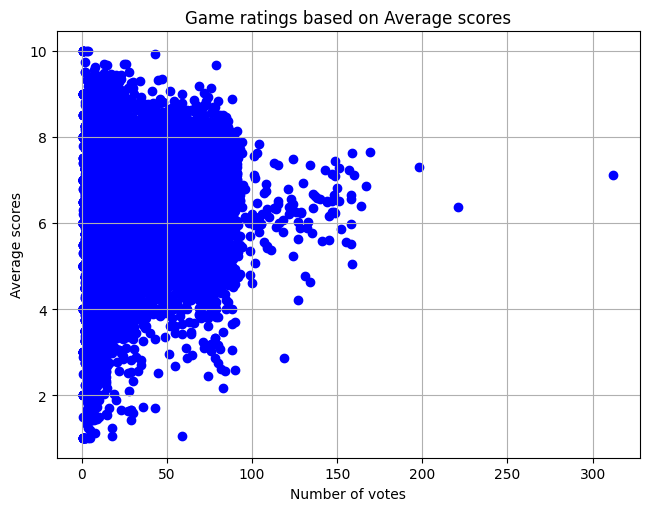

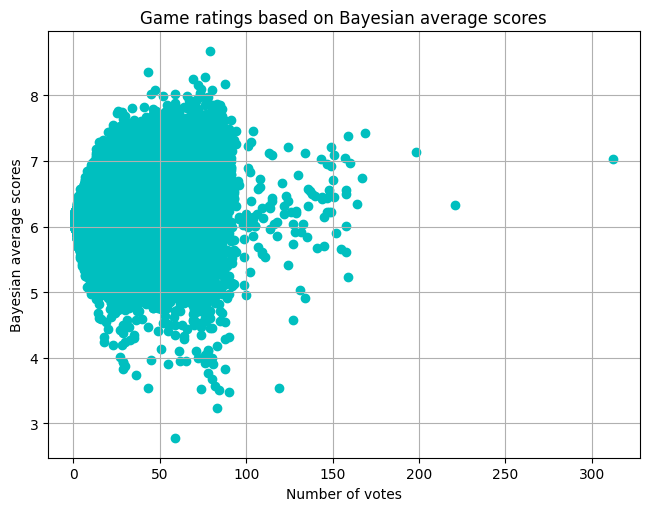

In [66]:
viz = DataVisualization(x,y,z)
viz.plot_average_ranking()
viz.plot_bayesian_ranking()